# Reaction Time Analysis
#### Abstract: 
The following experiment measures the reaction time for a light and dark mode color scheme application. The participants were in a range of 18 to 25 year old german students who use a computer on a daily basis. All of them were familiar with the light/dark mode setting of devices and applications. 

Each participant made a run either first in light or dark mode and was instructed to press the space key after a geometrical shape was displayed. After each display the reaction time until the space bar was hit is measured.

In the second condition the participant was instructed to press the spacebar only if a rectangle shape was displayed and not if a circle appeared. 

## Extract data from all logging files

In [24]:
import pandas as pd
import glob

In [25]:
# read every log file
# used code from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = '.' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

df_allData = pd.concat(li, axis=0, ignore_index = True)
display(df_allData)

,id,condition,mode,run,key_pressed,correct_key_pressed,reaction_time_in_sec,time_waited_in_sec,timestamp
0,1,1,light,1,space,True,0.1,2,1545730084
1,1,1,dark,2,space,False,1.4,4,1545730089
2,1,2,dark,2,space,False,1.2,4,1545730089
3,1,1,dark,1,space,True,2.9,3,1545730073
4,1,1,light,2,space,True,2.4,4,1545730074
5,1,2,light,2,space,True,2.0,5,1545730074


In [31]:
# filter data for light mode
print("Light Mode data")
df_light = df_allData[df_allData['mode'] == "light"]
display(df_light)

# filter data for dark mode
print("Light Mode data")
df_dark = df_allData[df_allData['mode'] == "dark"]
display(df_dark)

Light Mode data


,id,condition,mode,run,key_pressed,correct_key_pressed,reaction_time_in_sec,time_waited_in_sec,timestamp
0,1,1,light,1,space,True,0.1,2,1545730084
4,1,1,light,2,space,True,2.4,4,1545730074
5,1,2,light,2,space,True,2.0,5,1545730074


Light Mode data


,id,condition,mode,run,key_pressed,correct_key_pressed,reaction_time_in_sec,time_waited_in_sec,timestamp
1,1,1,dark,2,space,False,1.4,4,1545730089
2,1,2,dark,2,space,False,1.2,4,1545730089
3,1,1,dark,1,space,True,2.9,3,1545730073


## Prepare data

In [27]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sms

Text(0.5, 1.0, 'Light Mode')

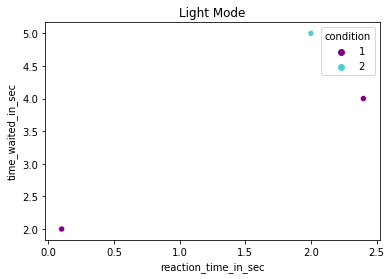

In [44]:
sms.scatterplot(data=df_light, x="reaction_time_in_sec",y="time_waited_in_sec", hue="condition", palette=["purple", "#55CCCC"]).set_title("Light Mode")

In [45]:
sms.scatterplot(data=df_dark, x="reaction_time_in_sec",y="time_waited_in_sec", hue="condition", palette=["purple", "#55CCCC"]).set_title("Dark Mode")

SyntaxError: invalid syntax (<ipython-input-45-1638c83fcdcd>, line 1)